In [1]:
import scenic

from scenic.syntax.veneer import localPath
from scenic.core.regions import MeshVolumeRegion
from rulebook_benchmark.realization import Realization
import random
from scenic.simulators.metadrive import MetaDriveSimulator

random.seed(3)

MAX_STEPS = 200

realization = Realization(MAX_STEPS)
scenario = scenic.scenarioFromFile('challenge10.scenic', params={"realization":realization}, model="scenic.simulators.metadrive.model", mode2D=True)
scene, _ = scenario.generate()
simulator = MetaDriveSimulator(sumo_map='/Users/ekin/rulebook_benchmark/maps/Town05.net.xml')
simulation = simulator.simulate(scene, maxSteps=MAX_STEPS)

/Users/ekin/Scenic/src/scenic/core/errors.py:271: UserWarning: unable to install sys.excepthook to format Scenic backtraces
  warnings.warn("unable to install sys.excepthook to format Scenic backtraces")


In [2]:
network = realization.network
lane = network.lanes[0]


In [4]:
lane.group

<LaneGroup at 0x3279ded00; uid="road0_forward">

In [10]:
lane.polygon.bounds

(-36.39684662449465, 2.6121176466839504, 17.17151386574795, 6.242474619169168)

In [9]:
lane.polygons.bounds

(-36.39684662449465, 2.6121176466839504, 17.17151386574795, 6.242474619169168)

In [13]:
intersection = network.intersections[0]

In [2]:
from rulebook_benchmark.process_trajectory import process_trajectory

process_trajectory(realization)

96 states with ambiguous lanes
found same lane as previous 65
found same lane as previous 66
found same lane as previous 67
found same lane as previous 68
found same lane as previous 69
found same lane as previous 70
found same lane as previous 71
found same lane as previous 72
found same lane as previous 73
found same lane as previous 74
found same lane as previous 75
found same lane as previous 76
found same lane as previous 77
found same lane as previous 78
found same lane as previous 79
found same lane as previous 80
found same lane as previous 81
found same lane as previous 82
found same lane as previous 83
found same lane as previous 84
found same lane as previous 85
found same lane as previous 86
found same lane as previous 87
found same lane as previous 88
found same lane as previous 89
found same lane as previous 90
found same lane as previous 91
found same lane as previous 92
found same lane as previous 93
found same lane as previous 94
found same lane as previous 95
found sa

In [3]:
len(realization.get_ego().trajectory)

201

In [5]:
len(realization.objects_non_ego[0].trajectory)

201

In [ ]:
lane.orientation

3.1347239666905735

In [27]:
intersection.maneuvers[2].connectingLane.maneuvers

(Maneuver(type=<ManeuverType.STRAIGHT: 1>, startLane=<Lane at 0x327183700; uid="road67_lane0">, endLane=<Lane at 0x32383bdf0; uid="road4_lane2">, connectingLane=None, intersection=None),)

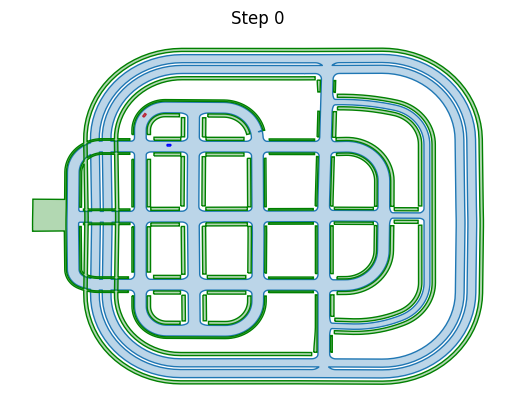

In [3]:
import shapely

import shapely.plotting
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ego = realization.get_ego()
adv = realization.get_object(1)
network = realization.network

multiplier = 2

drivable_region = network.drivableRegion
walkable_region = network.walkableRegion
def update(frame):
    ax.clear()
    frame = frame*multiplier
    
    ego_state = ego.get_state(frame)
    
    
    ego_region = MeshVolumeRegion(mesh=ego.mesh, dimensions=ego.dimensions, rotation=ego_state.orientation, position=ego_state.position)
    
    
    shapely.plotting.plot_polygon(ego_region.boundingPolygon.polygons, ax=ax, add_points=False, color='red')    
    shapely.plotting.plot_polygon(drivable_region.polygons, ax=ax, add_points=False)
    shapely.plotting.plot_polygon(walkable_region.polygons, ax=ax, add_points=False, color='green')
    
    for adv in realization.objects_non_ego:
        
        adv_state = adv.get_state(frame)        
        adv_region = MeshVolumeRegion(mesh=adv.mesh, dimensions=adv.dimensions, rotation=adv_state.orientation, position=adv_state.position)
        if adv.object_type == 'Pedestrian':
            color = 'purple'
        else:
            color = 'blue'
        
        shapely.plotting.plot_polygon(adv_region.boundingPolygon.polygons, ax=ax, add_points=False, color=color)
    plt.title(f"Step {frame}")
    ax.set_xticks([])
    ax.set_yticks([])


    
    #delete frame around plot
    for spine in ax.spines.values():
        spine.set_visible(False)
    


    
fig, ax = plt.subplots()

anim = animation.FuncAnimation(fig, update, frames=MAX_STEPS//multiplier, repeat=False)
#save_path = "scenario.gif"
#anim.save(save_path, fps=20)





    

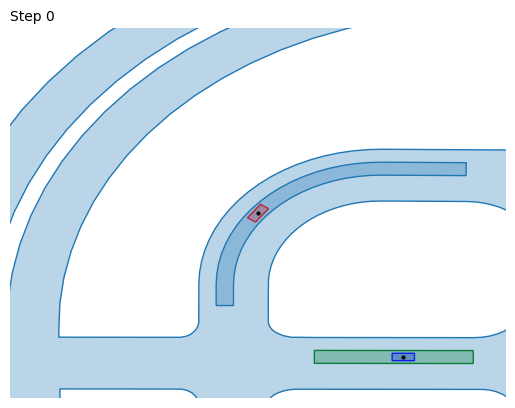

In [16]:
import shapely

import shapely.plotting
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ego = realization.get_ego()
adv = realization.get_object(1)
network = realization.network

multiplier = 2

drivable_region = network.drivableRegion
walkable_region = network.walkableRegion
def intersection_update(frame):
    ax.clear()
    frame = frame*multiplier
    
    ego_state = ego.get_state(frame)
    
    
    ego_region = MeshVolumeRegion(mesh=ego.mesh, dimensions=ego.dimensions, rotation=ego_state.orientation, position=ego_state.position)
    ego_center = shapely.Point(ego_state.position[0], ego_state.position[1])
    
    shapely.plotting.plot_points([ego_center], ax=ax, color='black', markersize=2)
    if ego_state.lane is not None:
        ego_lane = ego_state.lane.polygon
        shapely.plotting.plot_polygon(ego_lane, ax=ax, add_points=False)

    
    
    shapely.plotting.plot_polygon(ego_region.boundingPolygon.polygons, ax=ax, add_points=False, color='red')    
    
    
    for adv in realization.objects_non_ego:
        
        adv_state = adv.get_state(frame)        
        adv_region = MeshVolumeRegion(mesh=adv.mesh, dimensions=adv.dimensions, rotation=adv_state.orientation, position=adv_state.position)
        adv_center = shapely.Point(adv_state.position[0], adv_state.position[1])
        if adv.object_type == 'Pedestrian':
            color = 'purple'
        else:
            color = 'blue'
        if adv_state.lane is not None:
            adv_lane = adv_state.lane.polygon
            shapely.plotting.plot_polygon(adv_lane, ax=ax, add_points=False, color='green')
        shapely.plotting.plot_polygon(adv_region.boundingPolygon.polygons, ax=ax, add_points=False, color=color)
        shapely.plotting.plot_points([adv_center], ax=ax, color='black', markersize=2)
    
    shapely.plotting.plot_polygon(drivable_region.polygons, ax=ax, add_points=False)
    intersection_region = network.intersectionAt(ego_state.position)
    if intersection_region is not None:
        roads = intersection_region.roads
        for road in roads:
            shapely.plotting.plot_polygon(road.polygons, ax=ax, add_points=False, color='orange')
    ax.set_xticks([])
    ax.set_yticks([])


    
    #delete frame around plot
    for spine in ax.spines.values():
        spine.set_visible(False)
    #center plot around ego
    ax.set_xlim(ego_state.position[0]-50, ego_state.position[0]+50)
    ax.set_ylim(ego_state.position[1]-50, ego_state.position[1]+50)
    ax.set_title(f"Step {frame}", loc='left', fontsize=10, color='black')


    
fig, ax = plt.subplots()

anim = animation.FuncAnimation(fig, intersection_update, frames=MAX_STEPS//multiplier, repeat=False)
#save_path = "scenario.gif"
#anim.save(save_path, fps=20)





    

In [17]:
from IPython.display import HTML
from matplotlib import rc
rc('animation', html='jshtml')
HTML(anim.to_jshtml())

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


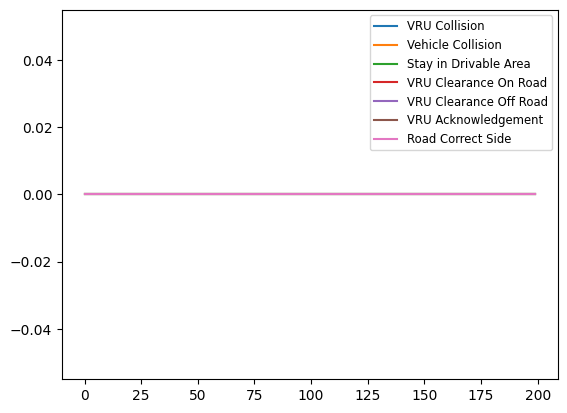

In [4]:
from rulebook_benchmark.rule_functions import default_rules
import matplotlib.pyplot as plt

histories = []
for rule in default_rules:
    violation, history = rule(realization)
    
    histories.append(history)
    plt.plot(history)
plt.legend([rule.name for rule in default_rules], loc='upper right', fontsize='small')
#make legend smaller
plt.savefig("violation_histories.png")
plt.show()
